<a href="https://colab.research.google.com/github/mohammedmudassirhussain/2216168_AIML_BOOTCAMP_2023/blob/main/Log_Reg_SUV_Purchase.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
df=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Boot Camp/Logistic Regression/SUV_Purchase/SUV_Purchase.csv")
print(df)

      User ID  Gender  Age  EstimatedSalary  Purchased
0    15624510    Male   19            19000          0
1    15810944    Male   35            20000          0
2    15668575  Female   26            43000          0
3    15603246  Female   27            57000          0
4    15804002    Male   19            76000          0
..        ...     ...  ...              ...        ...
395  15691863  Female   46            41000          1
396  15706071    Male   51            23000          1
397  15654296  Female   50            20000          1
398  15755018    Male   36            33000          0
399  15594041  Female   49            36000          1

[400 rows x 5 columns]


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [ ]:
df.tail(10)

,User ID,Gender,Age,EstimatedSalary,Purchased
390,15807837,Male,48,33000,1
391,15592570,Male,47,23000,1
392,15748589,Female,45,45000,1
393,15635893,Male,60,42000,1
394,15757632,Female,39,59000,0
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0
399,15594041,Female,49,36000,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


**Data Preprocessing**

In [ ]:
from sklearn import preprocessing
#Label Encoding Converting the Gender from characters to numbers
LE=preprocessing.LabelEncoder()

#Fitting the techiniques to the dataset
df.Gender=LE.fit_transform(df.Gender)
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,1,19,19000,0
1,15810944,1,35,20000,0
2,15668575,0,26,43000,0
3,15603246,0,27,57000,0
4,15804002,1,19,76000,0


Data Visualisation

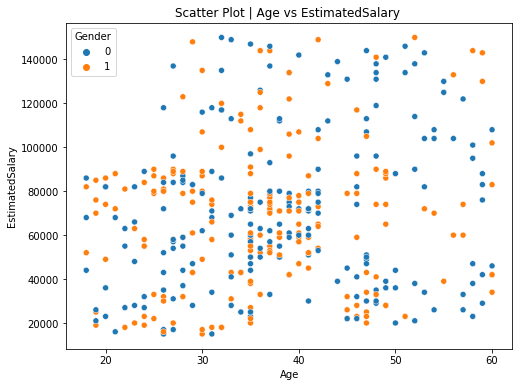

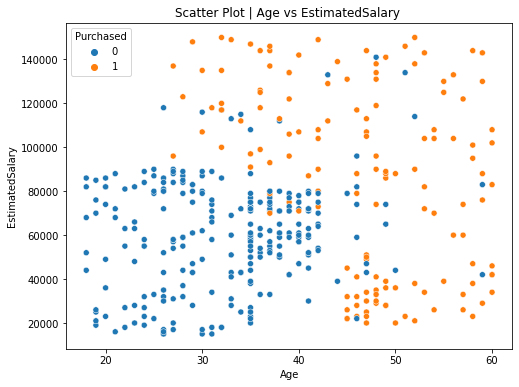

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_vs(frame,col1,col2,hue):
  plt.figure(figsize=(8,6))
  sns.scatterplot(data=frame,x=col1,y=col2,hue=hue)
  plt.title(f"Scatter Plot | {col1} vs {col2} ")

plot_vs(df,'Age','EstimatedSalary','Gender')
plot_vs(df,'Age','EstimatedSalary','Purchased')

In [ ]:
#Feature Engineering
df=df.drop(['User ID', 'Gender'], axis=1)

In [ ]:
#Method 1
X=df.iloc[:,:-1].values
Y=df.iloc[:,-1:].values

'''
#Method 2  Optional
import numpy as np
X1=np.array(df[['Age','EstimatedSalary']])
Y1=np.array(df[['Purchased']])
'''

"\n#Method 2  Optional\nimport numpy as np\nX1=np.array(df[['Age','EstimatedSalary']])\nY1=np.array(df[['Purchased']])\n"

In [ ]:
# Splitting the data set into training set and Testing set
from sklearn.model_selection import train_test_split 
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=0)

In [ ]:
#Normalising the data - Standard Scalar
from sklearn.preprocessing import StandardScaler
sst=StandardScaler()
X_train=sst.fit_transform(X_train)   #Normalizing
X_test=sst.transform(X_test)

In [ ]:
from sklearn.linear_model import LogisticRegression
clf=LogisticRegression()

In [ ]:
clf.fit(X_train,Y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [ ]:
Y_pred=clf.predict(X_test)

In [ ]:
print("Predicted score of the training dataset is ",clf.score(X_train,Y_train)*100)
print("Predicted score of the testing dataset is ",clf.score(X_test,Y_test)*100)
print("Overall Accuracy is ",clf.score(sst.transform(X),Y)*100)

Predicted score of the training dataset is  82.1875
Predicted score of the testing dataset is  92.5
Overall Accuracy is  84.25


In [ ]:
clf.score(X,Y) #Our model is didnt learn properly during training - if we dont normalize the data

0.3575

**Evaluation Metrix** To evaluate the performance

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
print("Confusion matrix for the Training Data:")
cm1=confusion_matrix(Y_train,clf.predict(X_train))
cm1

Confusion matrix for the Training Data:


array([[181,  18],
       [ 39,  82]])

In [ ]:
print("Confusion matrix for the Testing Data:")
cm2=confusion_matrix(Y_test,clf.predict(X_test))
cm2

Confusion matrix for the Testing Data:


array([[57,  1],
       [ 5, 17]])

In [ ]:
print("Confusion matrix for the Overall Data:")
actual = Y
predicted =clf.predict(sst.transform(X))
cm=confusion_matrix(actual,predicted)
cm

Confusion matrix for the Overall Data:


array([[238,  19],
       [ 44,  99]])

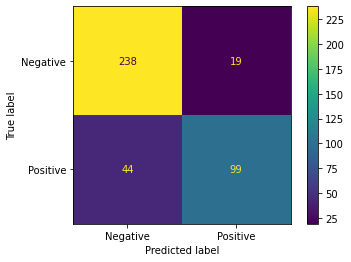

In [ ]:
import matplotlib.pyplot as plt
from sklearn import metrics
confusion_matrix=metrics.confusion_matrix(actual,predicted)
cm_display=metrics.ConfusionMatrixDisplay(confusion_matrix,display_labels=['Negative','Positive'])
cm_display.plot()

**Visulisation of Results**

**Visualisation of Training Data**

In [ ]:
#2D Array to 1D Array
Y_train=Y_train.flatten()

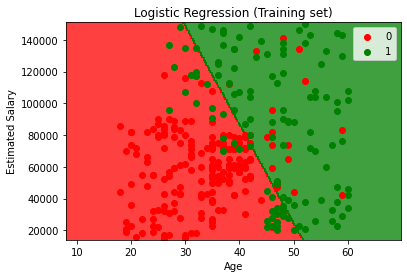

In [ ]:
#Flatten y loaded data into 1D array
#Keep same number of features for X as fited while training the algorithm
#rescale the X_train values - sst.inverse_transform(X_train)
 
from matplotlib.colors import ListedColormap
X_set, y_set = sst.inverse_transform(X_train), Y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 0.25),
                     np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 0.25))
plt.contourf(X1, X2, clf.predict(sst.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Logistic Regression (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

**Visuallisation of Testing Results**

In [ ]:
actual = Y
predicted =clf.predict(sst.transform(X))

**Progress Report of the ML Model**

In [ ]:
from sklearn.metrics import classification_report,classification_report,accuracy_score
print(classification_report(actual,predicted))

              precision    recall  f1-score   support

           0       0.84      0.93      0.88       257
           1       0.84      0.69      0.76       143

    accuracy                           0.84       400
   macro avg       0.84      0.81      0.82       400
weighted avg       0.84      0.84      0.84       400



In [ ]:
accuracy_score(actual,predicted)  #Sending the Y actual & Y pred

0.8425

In [ ]:
clf.score(X,Y)   #internally it performs the y_pred and compares with y actual - gives us accuracy

0.3575